In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import xarray as xr

In [2]:
expt_name = 'DAv7_M36_ASCAT_type_13_no_catdef_fp'
expt_name = 'DAv7_M36_ASCAT_type_2_fp_precip'

start_date = datetime(2015, 4, 1)
end_date = datetime(2018, 9, 30)

In [3]:
root_directory = f'/discover/nobackup/amfox/Experiments/{expt_name}/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg'

sm_surface_list = []
sm_rootzone_list = []
sm_profile_list = []
precipitation_total_surface_flux_list = []
vegetation_greenness_fraction_list = []
leaf_area_index_list = []

delta = timedelta(months=1)

current_date = start_date
while current_date <= end_date:
    year_month_directory = os.path.join(root_directory, 
                                        f"Y{current_date.year}", 
                                        f"M{current_date.month:02d}")
    print(year_month_directory)
    for filename in sorted(os.listdir(year_month_directory)):
        if filename.endswith('.nc4') and not filename.endswith('z.nc4') and filename.startswith(f'{expt_name}.SMAP_L4_SM_gph.20'):
            file_path = os.path.join(year_month_directory, filename)
            ds = xr.open_dataset(file_path)
            
            sm_surface = ds['sm_surface']
            sm_rootzone = ds['sm_rootzone']
            sm_profile = ds['sm_profile']
            precipitation_total_surface_flux = ds['precipitation_total_surface_flux']
            vegetation_greenness_fraction = ds['vegetation_greenness_fraction']
            leaf_area_index = ds['leaf_area_index']
                       
            sm_surface_list.append(sm_surface)
            sm_rootzone_list.append(sm_rootzone)
            sm_profile_list.append(sm_profile)
            precipitation_total_surface_flux_list.append(precipitation_total_surface_flux)
            vegetation_greenness_fraction_list.append(vegetation_greenness_fraction)
            leaf_area_index_list.append(leaf_area_index)

            ds.close()
    current_date += delta
            

/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04
/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M05
/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M05
/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M06
/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M07
/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M08
/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCA

In [4]:
# Concatenate the sfmc_increment values along the time dimension
print('working on sm_surface_concat')
sm_surface_concat = xr.concat(sm_surface_list, dim='time')
print('working on sm_rootzone_concat')
sm_rootzone_concat = xr.concat(sm_rootzone_list, dim='time')
print('working on sm_profile_concat')
sm_profile_concat = xr.concat(sm_profile_list, dim='time')
print('working on precipitation_total_surface_flux_concat')
precipitation_total_surface_flux_concat = xr.concat(precipitation_total_surface_flux_list, dim='time')
print('working on vegetation_greenness_fraction_concat')
vegetation_greenness_fraction_concat = xr.concat(vegetation_greenness_fraction_list, dim='time')
print('working on leaf_area_index_concat')
leaf_area_index_concat = xr.concat(leaf_area_index_list, dim='time')

working on sm_surface_concat
working on sm_rootzone_concat
working on sm_profile_concat
working on precipitation_total_surface_flux_concat
working on vegetation_greenness_fraction_concat
working on leaf_area_index_concat


In [5]:
np.savez(f'{expt_name}_SMAP_L4_SM_gph_concat.npz',
         sm_surface_concat=sm_surface_concat,
         sm_rootzone_concat=sm_rootzone_concat,
         sm_profile_concat=sm_profile_concat,
         precipitation_total_surface_flux_concat=precipitation_total_surface_flux_concat,
         vegetation_greenness_fraction_concat=vegetation_greenness_fraction_concat,
         leaf_area_index_concat=leaf_area_index_concat)

In [6]:
# Calculate the mean, etc  for each tile along the time dimension
mean_sm_surface = []
std_sm_surface = []
mean_sm_rootzone = []
std_sm_rootzone = []
mean_sm_profile = []
std_sm_profile = []
mean_precipitation_total_surface_flux = []
mean_vegetation_greenness_fraction = []
max_vegetation_greenness_fraction = []
mean_leaf_area_index = []
max_leaf_area_index = []

for i in range(len(sm_surface_concat['tile'])):
    mean_sm_surface.append(np.mean(sm_surface_concat[:, i]))
    std_sm_surface.append(np.std(sm_surface_concat[:, i]))
    mean_sm_rootzone.append(np.mean(sm_rootzone_concat[:, i]))
    std_sm_rootzone.append(np.std(sm_rootzone_concat[:, i]))
    mean_sm_profile.append(np.mean(sm_profile_concat[:, i]))
    std_sm_profile.append(np.std(sm_profile_concat[:, i]))
    mean_precipitation_total_surface_flux.append(np.mean(precipitation_total_surface_flux_concat[:, i]))
    mean_vegetation_greenness_fraction.append(np.mean(vegetation_greenness_fraction_concat[:, i]))
    max_vegetation_greenness_fraction.append(np.max(vegetation_greenness_fraction_concat[:, i]))
    mean_leaf_area_index.append(np.mean(leaf_area_index_concat[:, i]))
    max_leaf_area_index.append(np.max(leaf_area_index_concat[:, i]))

In [7]:
print(np.size(sm_profile_concat), sm_profile.dims, len(sm_surface_concat['time']), len(sm_surface_concat['tile']))

1179765040 ('time', 'tile') 10480 112573


In [8]:
# Save both the concatenated sfmc_increment and rzmc_increment values to a new npsavez file
np.savez(f'{expt_name}_SMAP_L4_SM_gph_stats.npz', 
         mean_sm_surface=mean_sm_surface,
         std_sm_surface=std_sm_surface,
         mean_sm_rootzone=mean_sm_rootzone,
         std_sm_rootzone=std_sm_rootzone,
         mean_sm_profile=mean_sm_profile,
         std_sm_profile=std_sm_profile,
         mean_precipitation_total_surface_flux=mean_precipitation_total_surface_flux,
         mean_vegetation_greenness_fraction=mean_vegetation_greenness_fraction,
         max_vegetation_greenness_fraction=max_vegetation_greenness_fraction,
         mean_leaf_area_index=mean_leaf_area_index,
         max_leaf_area_index=max_leaf_area_index)

In [9]:
# Calculate the mean, etc for each time step along the tile dimension
ts_mean_sm_surface = []
ts_std_sm_surface = []
ts_mean_sm_rootzone = []
ts_std_sm_rootzone = []
ts_mean_sm_profile = []
ts_std_sm_profile = []
ts_mean_precipitation_total_surface_flux = []
ts_mean_vegetation_greenness_fraction = []
ts_max_vegetation_greenness_fraction = []
ts_mean_leaf_area_index = []
ts_max_leaf_area_index = []

for i in range(len(sm_surface_concat['time'])):
    ts_mean_sm_surface.append(np.mean(sm_surface_concat[i, :]))
    ts_std_sm_surface.append(np.std(sm_surface_concat[i, :]))
    ts_mean_sm_rootzone.append(np.mean(sm_rootzone_concat[i, :]))
    ts_std_sm_rootzone.append(np.std(sm_rootzone_concat[i, :]))
    ts_mean_sm_profile.append(np.mean(sm_profile_concat[i, :]))
    ts_std_sm_profile.append(np.std(sm_profile_concat[i, :]))
    ts_mean_precipitation_total_surface_flux.append(np.mean(precipitation_total_surface_flux_concat[i, :]))
    ts_mean_vegetation_greenness_fraction.append(np.mean(vegetation_greenness_fraction_concat[i, :]))
    ts_max_vegetation_greenness_fraction.append(np.max(vegetation_greenness_fraction_concat[i, :]))
    ts_mean_leaf_area_index.append(np.mean(leaf_area_index_concat[i, :]))
    ts_max_leaf_area_index.append(np.max(leaf_area_index_concat[i, :]))

In [10]:
# Save the time series to a new npsavez file
np.savez(f'{expt_name}_SMAP_L4_SM_gph_timeseries.npz', 
         ts_mean_sm_surface=ts_mean_sm_surface,
         ts_std_sm_surface=ts_std_sm_surface,
         ts_mean_sm_rootzone=ts_mean_sm_rootzone,
         ts_std_sm_rootzone=ts_std_sm_rootzone,
         ts_mean_sm_profile=ts_mean_sm_profile,
         ts_std_sm_profile=ts_std_sm_profile,
         ts_mean_precipitation_total_surface_flux=ts_mean_precipitation_total_surface_flux,
         ts_mean_vegetation_greenness_fraction=ts_mean_vegetation_greenness_fraction,
         ts_max_vegetation_greenness_fraction=ts_max_vegetation_greenness_fraction,
         ts_mean_leaf_area_index=ts_mean_leaf_area_index,
         ts_max_leaf_area_index=ts_max_leaf_area_index)

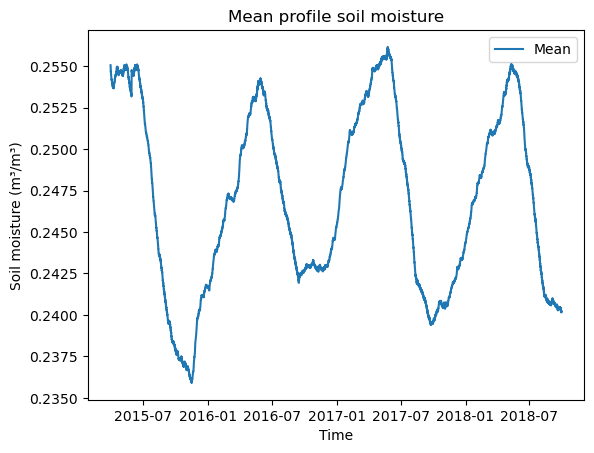

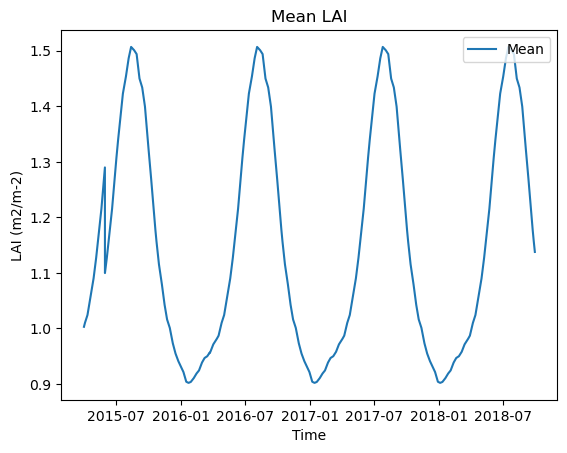

In [11]:
import matplotlib.pyplot as plt

# Determine the time interval between each time step using start and end date and length of time dimension
time_interval = (end_date - start_date) / (len(sm_surface_concat['time']) - 1)

# Create a time array
time = [start_date + i * time_interval for i in range(len(sm_surface_concat['time']))]

# Make a time series plot of the mean surface soil moisture
plt.figure()
plt.title('Mean profile soil moisture')
plt.plot(time, ts_mean_sm_profile, label='Mean')
#plt.fill_between(time, np.array(ts_mean_sm_profile) - np.array(ts_std_sm_profile), np.array(ts_mean_sm_profile) + np.array(ts_std_sm_profile), alpha=0.5, label='± 1 std dev')
plt.xlabel('Time')
plt.ylabel('Soil moisture (m³/m³)')
plt.legend(loc='upper right')
plt.show()

# Make a time series plot of the mean LAI
plt.figure()
plt.title('Mean LAI')
plt.plot(time, ts_mean_leaf_area_index, label='Mean')
#plt.fill_between(time, np.array(ts_mean_sm_profile) - np.array(ts_std_sm_profile), np.array(ts_mean_sm_profile) + np.array(ts_std_sm_profile), alpha=0.5, label='± 1 std dev')
plt.xlabel('Time')
plt.ylabel('LAI (m2/m-2)')
plt.legend(loc='upper right')
plt.show()

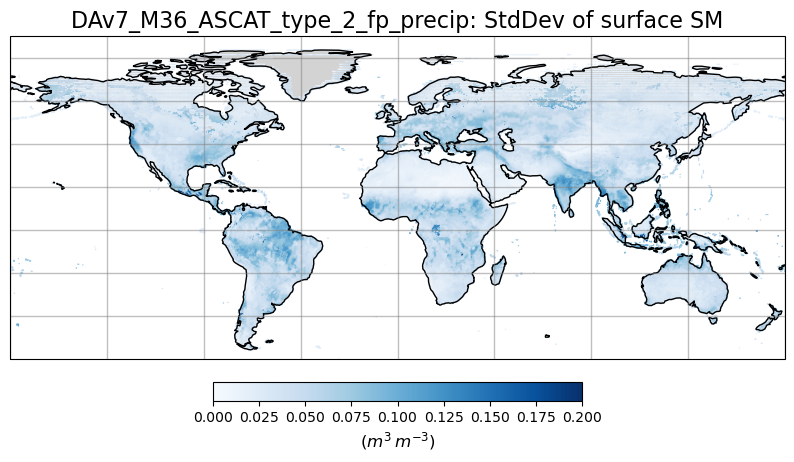

In [12]:
from mapper_functions import plot_global_tight

lon = ds['lon']
lat = ds['lat']

n_tile = len(lat)

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sm_surface
    
plot_global_tight(obarray,False,f'{expt_name}: StdDev of surface SM','($m^3 \, m^{-3}$)', 0, 0.2, cmap='Blues')


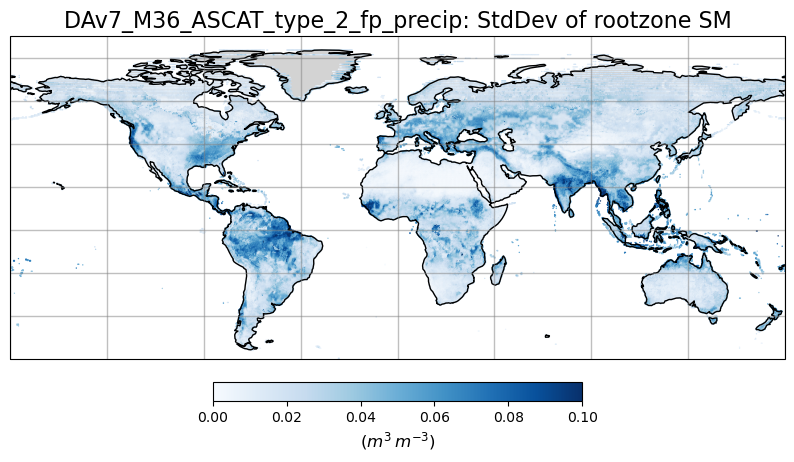

In [13]:
obarray[:, 0] = std_sm_rootzone
    
plot_global_tight(obarray,False,f'{expt_name}: StdDev of rootzone SM','($m^3 \, m^{-3}$)', 0, 0.1, cmap='Blues')

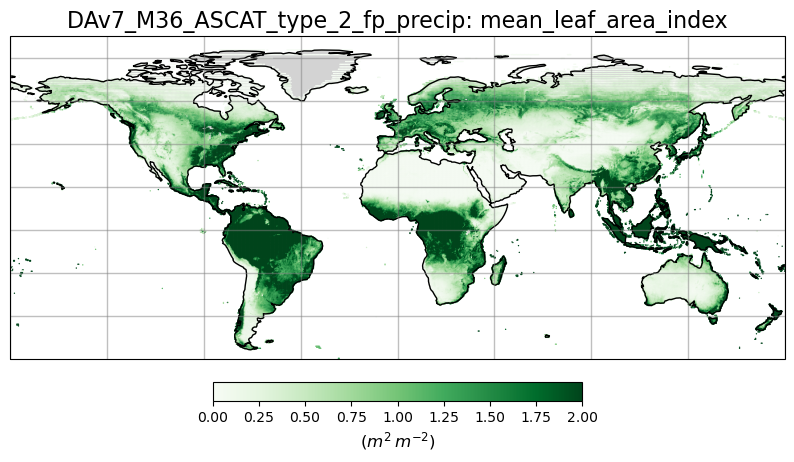

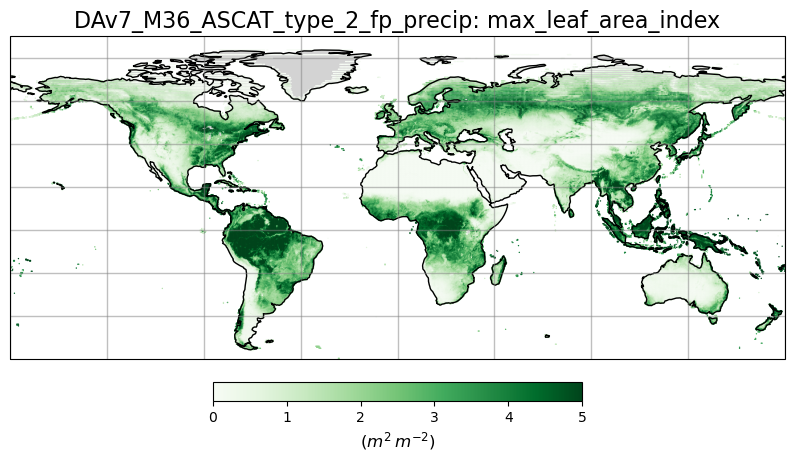

In [14]:
obarray[:, 0] = mean_leaf_area_index
    
plot_global_tight(obarray,False,f'{expt_name}: mean_leaf_area_index','($m^2 \, m^{-2}$)', 0, 2, cmap='Greens')

obarray[:, 0] = max_leaf_area_index
    
plot_global_tight(obarray,False,f'{expt_name}: max_leaf_area_index','($m^2 \, m^{-2}$)', 0, 5, cmap='Greens')

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/matplotlib/colors.py:1353: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/matplotlib/colors.py:719: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


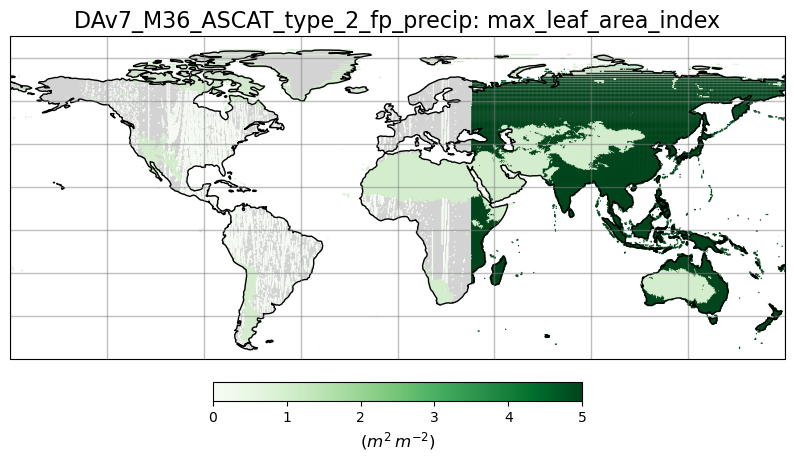

In [15]:
obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat

max_leaf_area_index_array = np.array(max_leaf_area_index)
mask = max_leaf_area_index_array < 0.5

obarray[mask,0] = 1
    
plot_global_tight(obarray,False,f'{expt_name}: max_leaf_area_index','($m^2 \, m^{-2}$)', 0, 5, cmap='Greens')